In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import pymc3 as pm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember the exponential and logistic functions

In [17]:
x = np.linspace(-3,3,200)

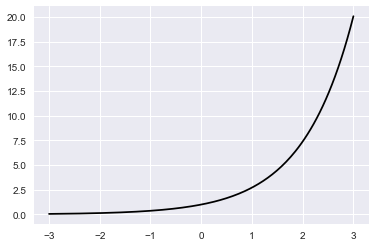

In [18]:
plt.plot(x, np.exp(x), 'k')

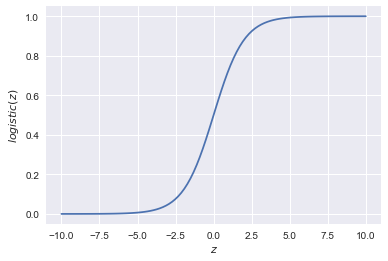

In [30]:
z = np.linspace(-10, 10, 100)
logistic_z = 1 / (1 + np.exp(-z))
# the above makes logistic_z an ndarray; or could do this 
# (but does this vectorize it?)
#logistic = lambda z: 1 / (1+ np.exp(-z))
# or
#logistic = lambda z: np.exp(z) / (np.exp(z) + 1)
# or
#from scipy.special import expit
#logistic = expit

plt.plot(z, logistic_z)
plt.xlabel('$z$')
plt.ylabel('$logistic(z)$')

# Simple logistic regression with the iris dataset

In [31]:
iris = sns.load_dataset('iris')
iris[:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


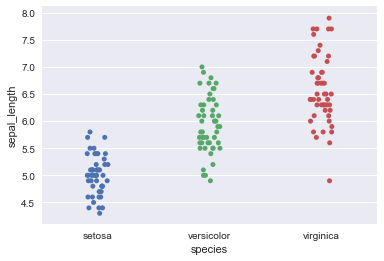

In [33]:
sns.stripplot(x='species',y='sepal_length',data=iris,jitter=True)

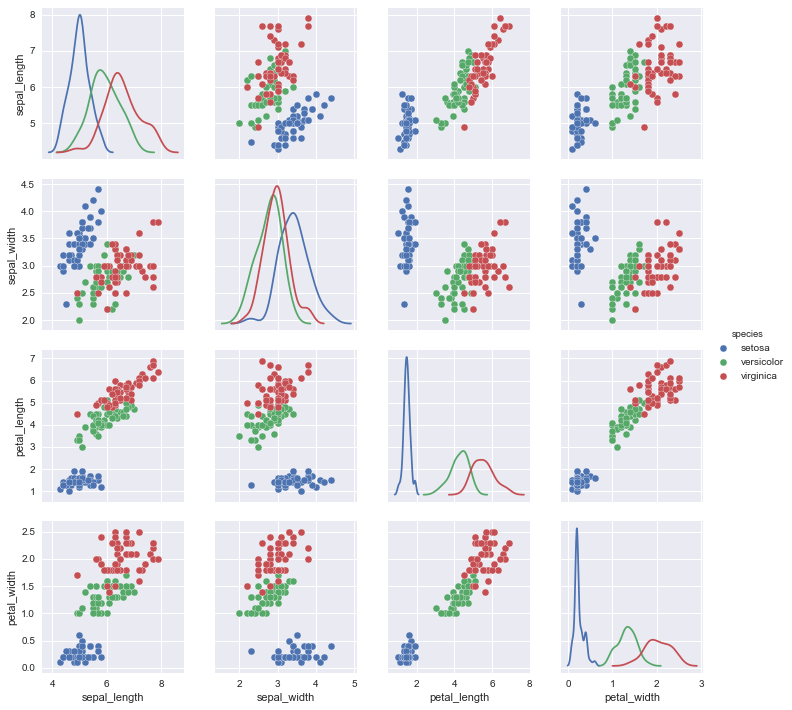

In [35]:
sns.pairplot(iris, hue='species', diag_kind='kde')

In [40]:
df = iris[(iris['species'] == 'setosa') | (iris['species'] == 'versicolor')]
len(df)

100

In [45]:
# i think this uses the pd.Categorical's 'codes' function to get
# a zero or one for each value of species - i.e., to encode the species
# text to 0/1, instead of doing it w/ a one-line
y_0 = pd.Categorical(df['species']).codes
y_0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [46]:
x_n = 'sepal_length'
x_0 = df[x_n].values
x_0

array([ 5.1,  4.9,  4.7,  4.6,  5. ,  5.4,  4.6,  5. ,  4.4,  4.9,  5.4,
        4.8,  4.8,  4.3,  5.8,  5.7,  5.4,  5.1,  5.7,  5.1,  5.4,  5.1,
        4.6,  5.1,  4.8,  5. ,  5. ,  5.2,  5.2,  4.7,  4.8,  5.4,  5.2,
        5.5,  4.9,  5. ,  5.5,  4.9,  4.4,  5.1,  5. ,  4.5,  4.4,  5. ,
        5.1,  4.8,  5.1,  4.6,  5.3,  5. ,  7. ,  6.4,  6.9,  5.5,  6.5,
        5.7,  6.3,  4.9,  6.6,  5.2,  5. ,  5.9,  6. ,  6.1,  5.6,  6.7,
        5.6,  5.8,  6.2,  5.6,  5.9,  6.1,  6.3,  6.1,  6.4,  6.6,  6.8,
        6.7,  6. ,  5.7,  5.5,  5.5,  5.8,  6. ,  5.4,  6. ,  6.7,  6.3,
        5.6,  5.5,  5.5,  6.1,  5.8,  5. ,  5.6,  5.7,  5.7,  6.2,  5.1,
        5.7])

In [50]:
with pm.Model() as model_0:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10)
    
    mu = alpha + pm.math.dot(x_0, beta)
    theta = pm.Deterministic('theta', pm.math.sigmoid(mu))
    # same as pm.Deterministic('theta', 1 / (1 + pm.math.exp(-mu)))
    bd = pm.Deterministic('bd', -alpha/beta)
    
    yl = pm.Bernoulli('yl', theta, observed=y_0)
    
    trace_0 = pm.sample(5000)
    
chain_0 = trace_0[1000:]

/Users/andrewenfield/miniconda3/envs/anaconda/lib/python3.6/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -49.12: 100%|██████████| 200000/200000 [00:13<00:00, 15280.30it/s] 
Finished [100%]: Average ELBO = -48.255
100%|██████████| 5000/5000 [00:15<00:00, 314.06it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125c56780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127e27ac8>]], dtype=object)

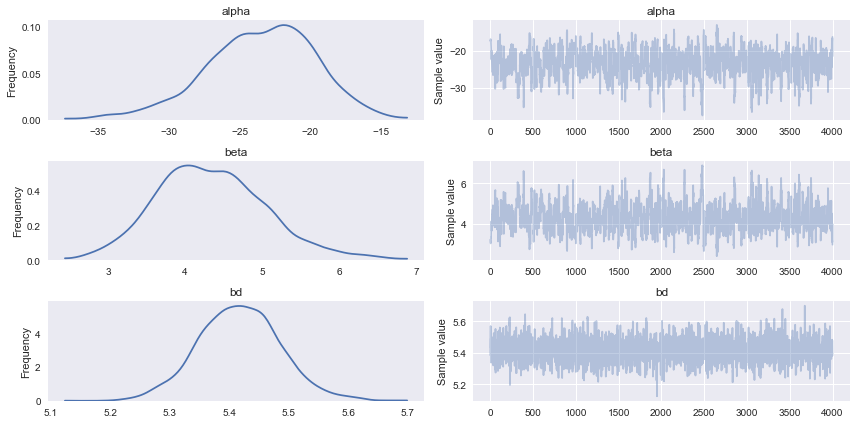

In [51]:
varnames = ['alpha', 'beta', 'bd']
pm.traceplot(chain_0, varnames)

In [52]:
pm.df_summary(chain_0, varnames)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,-23.531170,3.874676,0.178204,-31.169689,-16.116591
beta,4.345976,0.718988,0.033165,2.977283,5.800084
bd,5.415609,0.068451,0.001407,5.274116,5.545656


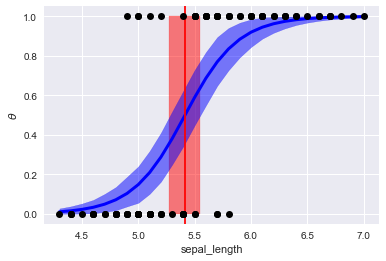

In [60]:
theta = chain_0['theta'].mean(axis=0)
idx = np.argsort(x_0)
plt.plot(x_0[idx], theta[idx], color='b', lw=3)
plt.axvline(chain_0['bd'].mean(), ymax=1, color='r')
bp_hpd = pm.hpd(chain_0['bd'])
plt.fill_betweenx([0,1], bp_hpd[0], bp_hpd[1], color='r', alpha=0.5)

plt.plot(x_0, y_0, 'o', color='k')
theta_hpd = pm.hpd(chain_0['theta'])[idx]
plt.fill_between(x_0[idx], theta_hpd[:,0], theta_hpd[:,1], color='b', alpha=0.5)

plt.xlabel(x_n)
plt.ylabel(r'$\theta$')

Ok, so here bd is the 'decision boundary', and ends up - with the above defintion as -negative alpha / beta - as the value of xi for which y = 0.5. See the text for how to derive this. If we don't want to use 0.5, we could, I suppose (but is there a better/clearer) way use a different formula.

Or, we could leave out the boundary in the model and do it afterwards using the chain? Is this second way how Kruschke does it?

Also, note that I think here the value of theta that comes from the logistic(alpha + x dot beta) part is easily interpreted as the probability - from 0 to 1 of course, since that's what we need and that's what the logistic function guarantees us (since it squashes the real number line from -inf to +info to 0 to 1) - that the given observation is of type 1. 

Put differently, I think this seems simpler than the traditional logistic regression detail where - I think, if I remember correctly - the value from the linear function is the log odds (?) and you take the logistic to get the output? Or is it something different - I'd need to look it up again.

In [63]:
def predict(n, threshold):
    n = np.array(n)
    mu = chain_0['alpha'].mean() + chain_0['beta'].mean() * n
    prob = 1 / (1 + np.exp(-mu))
    return prob, prob > threshold

predict([5, 5.5, 6], 0.5)

(array([ 0.14169434,  0.59186972,  0.92721586]),
 array([False,  True,  True], dtype=bool))

I think there are at least some other ways to do prediction - for ex, does Kruschke somehow sample from the posterior instead of just taking the mean?

# Multiple logistic regression

Now we'll predict using both sepal length and sepal width.

In [66]:
x_n = ['sepal_length', 'sepal_width']
x_1 = df[x_n].values

/Users/andrewenfield/miniconda3/envs/anaconda/lib/python3.6/site-packages/theano/tensor/basic.py:2146: UserWarning: theano.tensor.round() changed its default from `half_away_from_zero` to `half_to_even` to have the same default as NumPy. Use the Theano flag `warn.round=False` to disable this warning.
  "theano.tensor.round() changed its default from"
Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -22.497: 100%|██████████| 200000/200000 [00:12<00:00, 16418.47it/s]
Finished [100%]: Average ELBO = -22.353
100%|██████████| 5000/5000 [00:26<00:00, 186.10it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d760e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12d81bcf8>]], dtype=object)

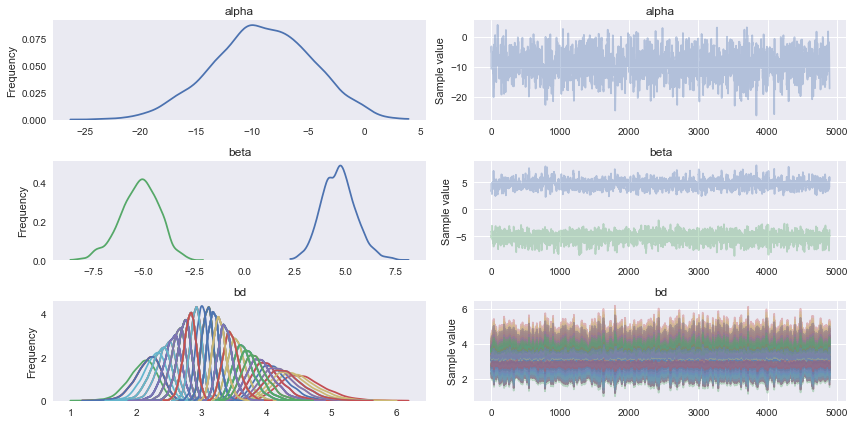

In [79]:
with pm.Model() as model_1:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=2, shape=len(x_n))
    
    mu = alpha + pm.math.dot(x_1, beta)
    #theta = 1 / (1 + pm.math.exp(-mu)) # not sure why this code from the book doesn't work, but the following line does fine
    theta = pm.math.sigmoid(mu)
    bd = pm.Deterministic('bd', -alpha/beta[1] - beta[0]/beta[1] * x_1[:,0])
    
    yl = pm.Bernoulli('yl', p=theta, observed=y_0)

    trace_1 = pm.sample(5000)
chain_1 = trace_1[100:]
varnames = ['alpha', 'beta']
pm.traceplot(chain_1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a414940>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12d6acf60>]], dtype=object)

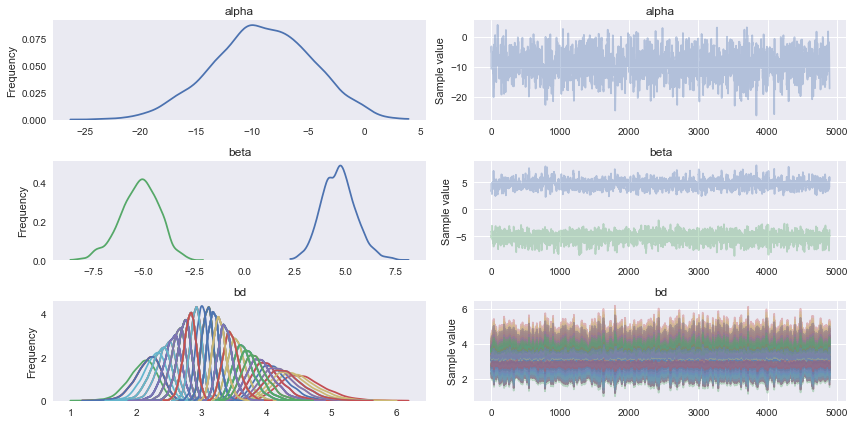

In [80]:
varnames = ['alpha', 'beta', 'bd']
pm.traceplot(chain_1, varnames)

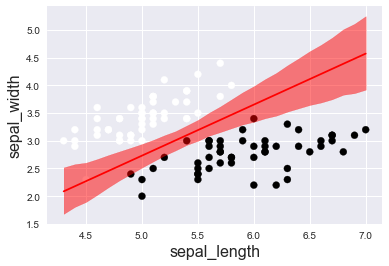

In [81]:
idx = np.argsort(x_1[:,0])
bd = chain_1['bd'].mean(0)[idx]
plt.scatter(x_1[:,0], x_1[:,1], c=y_0)
plt.plot(x_1[:,0][idx], bd, color='r');

bd_hpd = pm.hpd(chain_1['bd'])[idx]
plt.fill_between(x_1[:,0][idx], bd_hpd[:,0], bd_hpd[:,1], color='r', alpha=0.5);

plt.xlabel(x_n[0], fontsize=16)
plt.ylabel(x_n[1], fontsize=16)